<a href="https://colab.research.google.com/github/Gurusudhan25/LD-Application/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [ ]:
url = "https://raw.githubusercontent.com/monicarevuru/minor/master/sld.csv"

df=pd.read_csv(url)

In [ ]:
df.head()

,MRD_no,Age,Gender,Class,Academic,Reading,Writing,Spelling,Copying,Language,...,Attention,Hyperactive,Impulsive,processing speed,Auditory Discrimination,Auditory Memory,Visual Memory,Visual Discrimination,Visuo motor,LD
0,1897315,11,Boy,5,poor,yes,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,yes
1,964977,6,Girl,1,good,yes,yes,yes,no,no,...,no,no,no,no,no,no,no,no,no,yes
2,1904740,8,Girl,3,good,no,yes,no,no,no,...,yes,yes,yes,no,no,no,no,yes,no,no
3,1198035,NaN,Boy,NaN,good,no,yes,yes,no,no,...,no,no,no,no,no,no,no,no,no,yes
4,1752943,NaN,Boy,NaN,good,yes,yes,yes,no,no,...,yes,yes,no,no,no,no,no,no,no,yes


In [ ]:
df.shape

(344, 23)

In [ ]:
df.columns

Index(['MRD_no', 'Age', 'Gender', 'Class', 'Academic', 'Reading', 'Writing',
       'Spelling', 'Copying', 'Language', 'Decoding', 'Fine Motor Skills',
       'Maths', 'Attention', 'Hyperactive', 'Impulsive', 'processing speed',
       'Auditory Discrimination', 'Auditory Memory', 'Visual Memory',
       'Visual Discrimination', 'Visuo motor', 'LD'],
      dtype='object')

In [ ]:
df=df.drop(['MRD_no'],axis=1)

In [ ]:
df = df.dropna(axis=1)
print(df.isna().sum())

Academic                   0
Reading                    0
Writing                    0
Spelling                   0
Copying                    0
Language                   0
Decoding                   0
Fine Motor Skills          0
Maths                      0
Attention                  0
Hyperactive                0
Impulsive                  0
processing speed           0
Auditory Discrimination    0
Auditory Memory            0
Visual Memory              0
Visual Discrimination      0
Visuo motor                0
LD                         0
dtype: int64


In [ ]:
df['LD'].value_counts()

yes    207
no     137
Name: LD, dtype: int64

In [ ]:
le = LabelEncoder()
df_cols=['Reading', 'Writing','Maths','Attention' ,'Hyperactive' ,'Visual Memory','Impulsive','Auditory Discrimination','Auditory Memory','Visual Discrimination','processing speed']


In [ ]:
for col in df_cols:
   le = LabelEncoder()
   le.fit(df[col])
   df[col] = le.transform(df[col])

In [ ]:
df.head()

,Academic,Reading,Writing,Spelling,Copying,Language,Decoding,Fine Motor Skills,Maths,Attention,Hyperactive,Impulsive,processing speed,Auditory Discrimination,Auditory Memory,Visual Memory,Visual Discrimination,Visuo motor,LD
0,poor,1,0,yes,no,no,no,no,1,0,0,0,0,0,0,0,0,no,yes
1,good,1,1,yes,no,no,no,no,1,0,0,0,0,0,0,0,0,no,yes
2,good,0,1,no,no,no,no,no,0,1,1,1,0,0,0,0,1,no,no
3,good,0,1,yes,no,no,no,no,1,0,0,0,0,0,0,0,0,no,yes
4,good,1,1,yes,no,no,no,no,1,1,1,0,0,0,0,0,0,no,yes


<AxesSubplot:>

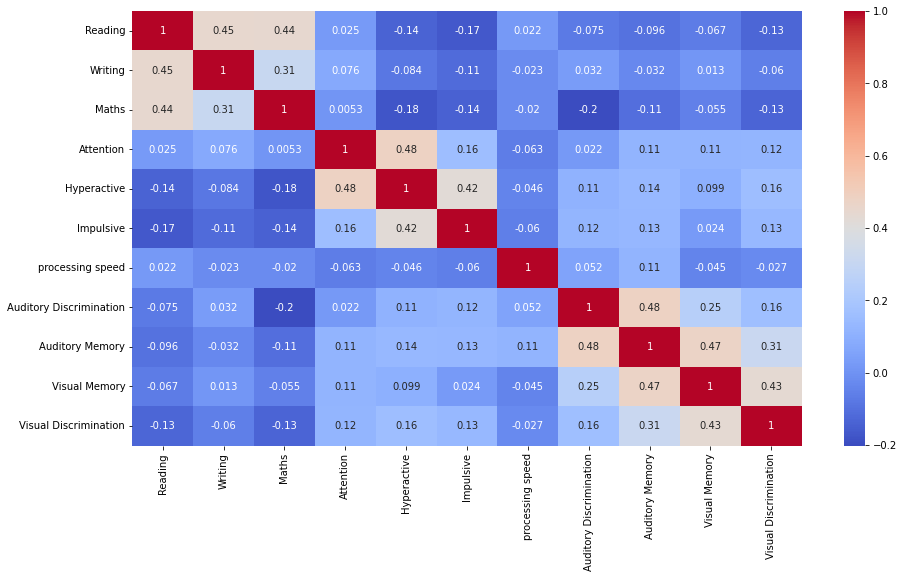

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

In [ ]:
features = df[['Reading', 'Writing','Maths','Attention' ,'Hyperactive' ,'Impulsive','Auditory Discrimination','Visual Discrimination']]
target = df['LD']

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

**Navie bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.855072463768116
              precision    recall  f1-score   support

          no       0.96      0.71      0.81        31
         yes       0.80      0.97      0.88        38

    accuracy                           0.86        69
   macro avg       0.88      0.84      0.85        69
weighted avg       0.87      0.86      0.85        69



In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.82608696, 0.82608696, 0.69565217, 0.62318841, 0.88235294])

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.8840579710144928
              precision    recall  f1-score   support

          no       0.85      0.90      0.88        31
         yes       0.92      0.87      0.89        38

    accuracy                           0.88        69
   macro avg       0.88      0.89      0.88        69
weighted avg       0.89      0.88      0.88        69



In [ ]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.79710145, 0.82608696, 0.71014493, 0.88405797, 0.85294118])

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.8405797101449275
              precision    recall  f1-score   support

          no       0.86      0.77      0.81        31
         yes       0.83      0.89      0.86        38

    accuracy                           0.84        69
   macro avg       0.84      0.83      0.84        69
weighted avg       0.84      0.84      0.84        69



In [ ]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.79710145, 0.8115942 , 0.71014493, 0.84057971, 0.82352941])

In [ ]:
print(model)
print(acc)

['Naive Bayes', 'SVM', 'RF']
[0.855072463768116, 0.8840579710144928, 0.8405797101449275]


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

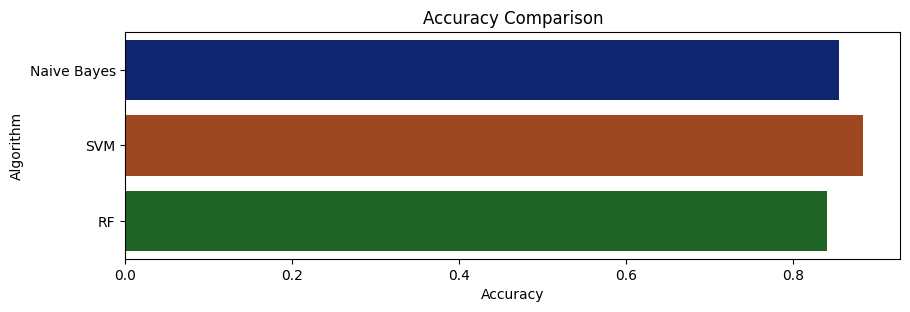

In [ ]:
plt.figure(figsize=[10,3],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)


Naive Bayes --> 0.855072463768116
SVM --> 0.8840579710144928
RF --> 0.8405797101449275


**TESTING THE MODEL**

In [ ]:
print("------ Welcome to ML School Application --------")
print('Enter Student details to find whether he must be improved or not?')


Reading=input("Does the Student Reads Well?: ")
Writing=input("Does the Student Writes Well?: ")
Maths=input("Does the Student Calculates Well?: ")
Attention=input("Does Student pays Attention?: ")
Hyperactive=input("is Student Hyperactive?:")
Impulsive=input("is Student Impulsive?: ")
Auditory_Discrimination=input("Does Student can discriminate voice?: ")
Visual_Discrimination=input("Does Student can discriminate visual?: ")

arr=[Reading,Writing,Maths,Attention,Hyperactive,Impulsive,Auditory_Discrimination,Visual_Discrimination]

------ Welcome to ML School Application --------
Enter Student details to find whether he must be improved or not?
Does the Student Reads Well?: Yes
Does the Student Writes Well?: No
Does the Student Calculates Well?: Yes
Does Student pays Attention?: No
is Student Hyperactive?:Yes
is Student Impulsive?: No
Does Student can discriminate voice?: No
Does Student can discriminate visual?: No


In [ ]:
le.fit(arr)
arr = le.transform(arr)
val = np.array([arr])

prediction = RF.predict(val)
if (prediction[0]=='yes'):
  print("The student is Suffering from Learning Disability Should be Helped to improve")
else:
  print("No, Student is fine")

The student is Suffering from Learning Disability Should be Helped to improve
